<b> Goal </b> <br> 
This tutorial will cover basic matrix transformation.
The following function is defined in this tutorial assuming you understand what this words meant. <br> 
-Matrix Rotation<br> 
-Matrix Commute<br> 
-Matrix Determinant, Transpose, and Inverse

In [6]:
from PIL import Image  #This imports the Python Image Library (PIL).
import math   #Module for extra math functions
import numpy as np   #The main module that allows us to create and manipulate matrices

get_ipython().magic('matplotlib inline')   #this is included to help make our plots 
import matplotlib.pyplot as plt            #this is the main plotting module
A_1 = np.array([[1,2],[3,4]])
A_2 = np.array([[4,3],[2,1]])
A_3 = A_2 - A_1 

In [7]:
#This function return a 2X2 rotation matrix for the given input angle
#feel free to go to the wikipedia page for "Rotation Matrix" to remind you of how it works
#and you can use the math module for math.cos() and math.sin()
def RotMat(theta):
    RM = np.array([[math.cos(theta),math.sin(-theta)],[math.sin(theta),math.cos(theta)]])  #modify the entries here
    return RM
 
r_1 = np.dot(A_1,RotMat(45))
print (r_1)


[[ 2.22712904  0.19974045]
 [ 4.97958006 -0.45142262]]


<b> Exercise: </b> 
test it out by creating a rotation matrix and multiplying it with a few column matrices
(which represent points in the plane) to verify that it works.


In [8]:
#We can also create a simple function to test if matrices commute
#Feel free to go to the wikipedia page to find out what it means that "Matrices commute"
def Commutator(Ain,Bin):   #this returns the difference of the two matrices multiplied the two ways
    com = np.dot(Ain,Bin) - np.dot(Bin,Ain)
    return com
c_2 = Commutator(A_1,A_2)
print (c_2)

def DoCommute(Ain,Bin):  #this returns true if they commute and false if they do not
    com = Commutator(Ain,Bin)   #getting the commutator
    ZeroMat = np.zeros(Ain.shape)  #getting an appropriately sized zero matrix
    CVal = False
    if np.array_equal(com,ZeroMat):  #if they are equivalent, then Ain and Bin commute
        CVal = True
    return CVal
c_3 = DoCommute(A_1,A_2)
print (c_3)

[[ -5 -15]
 [ 15   5]]
False


In [9]:
#Matrix Determinant, Transpose, and Inverse
#First the Transpose
A_6 = A_1.transpose()
print("The transpose of \n", A_1, "\n is \n", A_6)

#Now for the Determinant 
det1 = np.linalg.det(A_1)
print("The determinant of \n",A_1,"\n is \n", det1)

#And finally the inverse
A_7 = np.linalg.inv(A_1)
print("The inverse of \n", A_1, "\n is \n", A_7)

#and we can check that really is an inverse
A_8 = np.dot(A_1,A_7)
print(A_1, "\n times \n", A_7, "\n is \n", A_8)  #notice that it gives back the identity

The transpose of 
 [[1 2]
 [3 4]] 
 is 
 [[1 3]
 [2 4]]
The determinant of 
 [[1 2]
 [3 4]] 
 is 
 -2.0000000000000004
The inverse of 
 [[1 2]
 [3 4]] 
 is 
 [[-2.   1. ]
 [ 1.5 -0.5]]
[[1 2]
 [3 4]] 
 times 
 [[-2.   1. ]
 [ 1.5 -0.5]] 
 is 
 [[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


<b> Exercise: </b> 
Solve the following system of equations by representing it in matrix form: A1*x=b_1<br>
System of equations: <br>
2x - 3y  = -1<br>
-5x + 5y = 20

In [14]:
#Your Turn.  
#Hint: S_1 = np.array([[2,-3],[-5,5]])

#and finding x = A^(-1)*b

#Now for the Determinant 

#And finally the inverse


In [16]:
S_1 = np.array([[2,-3],[-5,5]])
print (S_1)

#and finding x = A^(-1)*b
S_6 = S_1.transpose()
print("The transpose of \n", S_1, "\n is \n", S_6)

#Now for the Determinant 
det1 = np.linalg.det(S_1)
print("The determinant of \n",S_1,"\n is \n", det1)

#And finally the inverse
S_7 = np.linalg.inv(S_1)
print("The inverse of \n", S_1, "\n is \n", S_7)

S_8 = np.dot(S_1,S_7)
print(S_1, "\n times \n", S_7, "\n is \n", S_8)  


S_9 = np.array([[-1],[20]])
S_10 = np.dot(S_7,S_9)
print ("answer of the equations is", S_10) 

#Addtional exercise:
#System of equations:  5x - 3y = 12 and 2x + y = -7


[[ 2 -3]
 [-5  5]]
The transpose of 
 [[ 2 -3]
 [-5  5]] 
 is 
 [[ 2 -5]
 [-3  5]]
The determinant of 
 [[ 2 -3]
 [-5  5]] 
 is 
 -4.999999999999998
The inverse of 
 [[ 2 -3]
 [-5  5]] 
 is 
 [[-1.  -0.6]
 [-1.  -0.4]]
[[ 2 -3]
 [-5  5]] 
 times 
 [[-1.  -0.6]
 [-1.  -0.4]] 
 is 
 [[1. 0.]
 [0. 1.]]
answer of the equations is [[-11.]
 [ -7.]]


<b> Visualize matrix transformation </b> <br> 
Matrices as transformations (in the plane).  We can think of the matrix equation A*x1 = x2 as a point in the plane (x1)
being tranformed (via the 2x2 transformation matrix, A) to another point in the plane (x2).
We would like to think about how transformation matrices tranform all the points in the plane.
To do this we will consider the unit disk with the four quadrants colored differently.  
Then we will see how different martices transform this image.


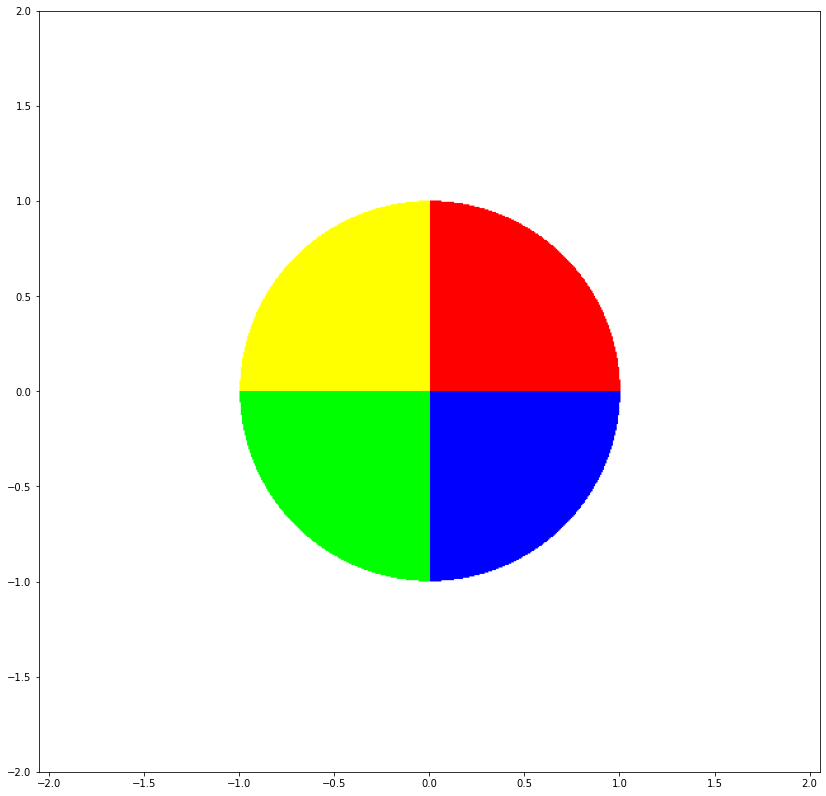

In [17]:
#First let's just see what the original, un-transformed, domain looks like
xpixels = 600  #the number of pixels in each line in the x-direction 
ypixels = 600  #the number of pixels in each column of the y-direction (total pixels = xpixels*ypixels)
xstart = -2    #the x-value of the first pixel
ystart = 2     #the y-value of the first pixel
xrange = 4     #how wide the domain is in the x-direction
yrange = 4     #how tall the domain is in the y-direction
dx = xrange/(xpixels-1)   #this specifies the distance between two neighboring points in the x direction
dy = yrange/(ypixels-1)   #this specifies the distance between two neighboring points in the y direction

SquareIm = Image.new("RGB", (xpixels,ypixels))  #This creates a new image (SquareIm) to which we will add pixels
for y_ind in range(0,ypixels):
    for x_ind in range(0,xpixels):
        x = xstart + dx*float(x_ind)  #the current x-value of the pixel we are considering
        y = ystart - dy*float(y_ind)  #the current y-vlaue of the pixel we are considering
        #if abs(x) > 1 or abs(y) > 1:   #the pixel is outside of the 2x2 square and will be colored white
        if x**2+y**2 > 1:    #the pixel is outside of the unit sphere and will be colored white
            SquareIm.putpixel((x_ind,y_ind), (255,255,255))
        else:      #the pixel is inside the unit disk and we need to determine which quadrant it is in
            if x > 0:
                if y > 0:
                    SquareIm.putpixel((x_ind,y_ind), (255,0,0))  #first quadrant will be red
                else:
                    SquareIm.putpixel((x_ind,y_ind), (0,0,255))  #fourth quadrant will be blue
            else:
                if y > 0:
                    SquareIm.putpixel((x_ind,y_ind), (255,255,0))  #second quadrant will be yellow
                else:
                    SquareIm.putpixel((x_ind,y_ind), (0,255,0))  #third quadrant will be green
                    
fig, ax = plt.subplots(figsize=(14,14))  #this sets the size of our image
ax.axis('equal')  #this ensures that the image will be a square here
ax.imshow(SquareIm,extent=[xstart,xstart+xrange,ystart-yrange,ystart])  #this shows the image with axes

The determinant of 
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]] 
 is 
 -1.0


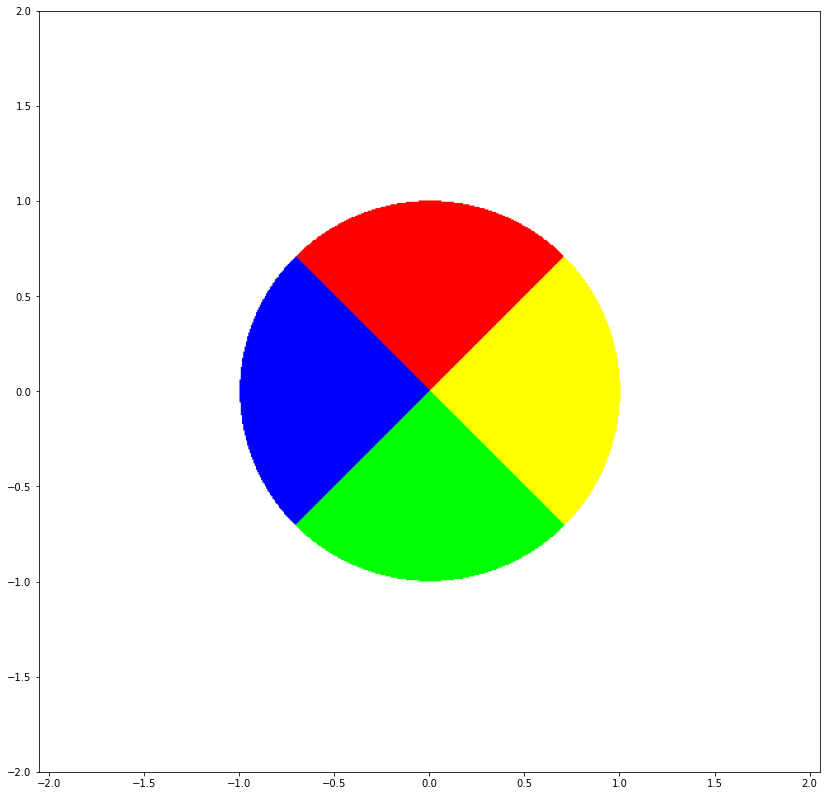

In [18]:
#Now let's see how a matrix transforms this image
A = np.array( [[-2**(-1/2),2**(-1/2)],[2**(-1/2),2**(-1/2)]] )  
#this is the matrix that you should change to see the effect of different transformations

#we will be using the inverse of this matrix to map points on a grid backward to see which color they land on
#in the above image ... The image that results will be the transform under A of the original image.
Ainv = np.linalg.inv(A)

#the number of pixels in each direction, and the domain specification are the same as in the previous image,
#so we will use the same variables

TransSquareIm = Image.new("RGB", (xpixels,ypixels))  #This creates a new image (TransSquareIm) to which we will add pixels
for y_ind in range(0,ypixels):
    for x_ind in range(0,xpixels):
        x = xstart + dx*float(x_ind)  #the current x-value of the pixel we are considering
        y = ystart - dy*float(y_ind)  #the current y-vlaue of the pixel we are considering
        
        XYcolvec = np.array( [[x],[y]])    #this creates a column vector (2x1 matrix) from the x and y values
        XYcolvecPrev = np.dot(Ainv,XYcolvec)  #this takes the matrix product 
        XPrev = XYcolvecPrev[0][0]         #taking the x value of the resultant column vector 
        YPrev = XYcolvecPrev[1][0]         #and similarly for the y-value
        #if abs(XPrev) > 1 or abs(YPrev) > 1:   #the pixel is outside of the 2x2 square and will be colored white
        if XPrev**2+YPrev**2 > 1:       #the pixel is outside of the unit disk and will be colored white
            TransSquareIm.putpixel((x_ind,y_ind), (255,255,255))
        else:      #the pixel is inside the unit disk and we need to determine which quadrant it is in
            if XPrev > 0:
                if YPrev > 0:
                    TransSquareIm.putpixel((x_ind,y_ind), (255,0,0))  #first quadrant will be red
                else:
                    TransSquareIm.putpixel((x_ind,y_ind), (0,0,255))  #fourth quadrant will be blue
            else:
                if YPrev > 0:
                    TransSquareIm.putpixel((x_ind,y_ind), (255,255,0))  #second quadrant will be yellow
                else:
                    TransSquareIm.putpixel((x_ind,y_ind), (0,255,0))  #third quadrant will be green
                    
fig2, ax2 = plt.subplots(figsize=(14,14))  #this sets the size of our image
ax2.axis('equal')     #this ensures that the image will be a square here
ax2.imshow(TransSquareIm,extent=[xstart,xstart+xrange,ystart-yrange,ystart])   #this shows the image with axes
#Now for the Determinant 
det1 = np.linalg.det(A)
print("The determinant of \n",A,"\n is \n", det1)

The determinant of 
 [[1.    0.   ]
 [0.866 0.5  ]] 
 is 
 0.5


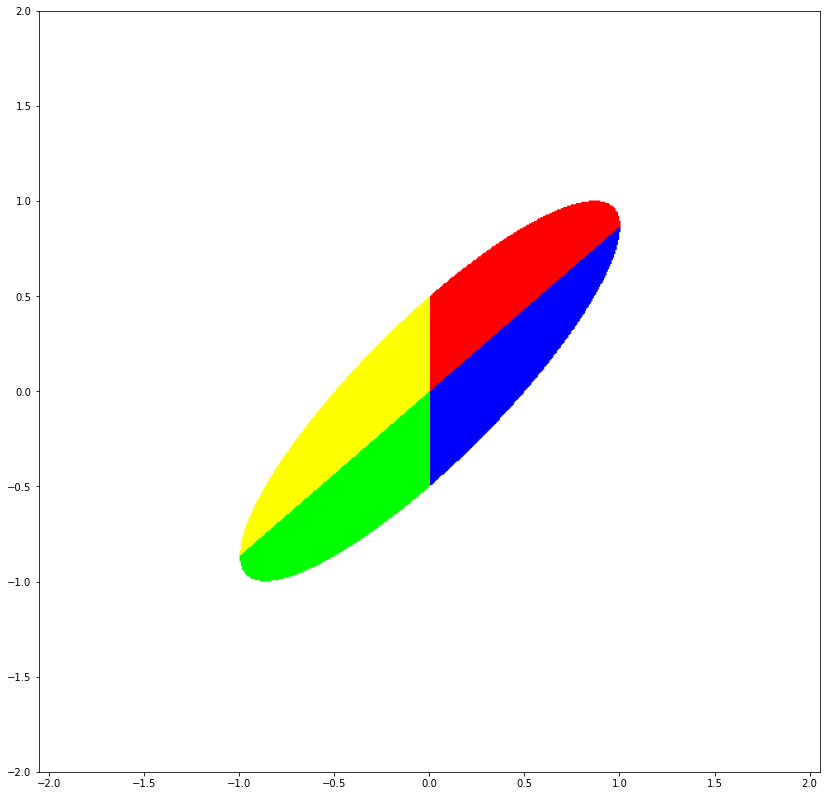

In [21]:
#Let's try out a number of different matrics in th cell to get a good feeling for the different types of 
#transformations that are possible.  For each of the matrices that you try, record in comments below the following
#information: the determinant, and your qualitative observations (rotation, reflection, stretching, squeezing, larger,
#smaller, etc.)

#Now let's see how a matrix transforms this image
A = np.array( [[1,0],[0.8660,0.5]] )  
#this is the matrix that you should change to see the effect of different transformations

#we will be using the inverse of this matrix to map points on a grid backward to see which color they land on
#in the above image ... The image that results will be the transform under A of the original image.
Ainv = np.linalg.inv(A)

#the number of pixels in each direction, and the domain specification are the same as in the previous image,
#so we will use the same variables

TransSquareIm = Image.new("RGB", (xpixels,ypixels))  #This creates a new image (TransSquareIm) to which we will add pixels
for y_ind in range(0,ypixels):
    for x_ind in range(0,xpixels):
        x = xstart + dx*float(x_ind)  #the current x-value of the pixel we are considering
        y = ystart - dy*float(y_ind)  #the current y-vlaue of the pixel we are considering
        
        XYcolvec = np.array( [[x],[y]])    #this creates a column vector (2x1 matrix) from the x and y values
        XYcolvecPrev = np.dot(Ainv,XYcolvec)  #this takes the matrix product 
        XPrev = XYcolvecPrev[0][0]         #taking the x value of the resultant column vector 
        YPrev = XYcolvecPrev[1][0]         #and similarly for the y-value
        #if abs(XPrev) > 1 or abs(YPrev) > 1:   #the pixel is outside of the 2x2 square and will be colored white
        if XPrev**2+YPrev**2 > 1:       #the pixel is outside of the unit disk and will be colored white
            TransSquareIm.putpixel((x_ind,y_ind), (255,255,255))
        else:      #the pixel is inside the unit disk and we need to determine which quadrant it is in
            if XPrev > 0:
                if YPrev > 0:
                    TransSquareIm.putpixel((x_ind,y_ind), (255,0,0))  #first quadrant will be red
                else:
                    TransSquareIm.putpixel((x_ind,y_ind), (0,0,255))  #fourth quadrant will be blue
            else:
                if YPrev > 0:
                    TransSquareIm.putpixel((x_ind,y_ind), (255,255,0))  #second quadrant will be yellow
                else:
                    TransSquareIm.putpixel((x_ind,y_ind), (0,255,0))  #third quadrant will be green
                    
fig2, ax2 = plt.subplots(figsize=(14,14))  #this sets the size of our image
ax2.axis('equal')     #this ensures that the image will be a square here
ax2.imshow(TransSquareIm,extent=[xstart,xstart+xrange,ystart-yrange,ystart])   #this shows the image with axes

#Now for the Determinant 
det1 = np.linalg.det(A)
print("The determinant of \n",A,"\n is \n", det1)